In [1]:
#Import Packages
import os
import pandas as pd
import numpy as np
import rasterio as rio

#Change Working Directory
os.chdir(r'C:\Users\malva\Thesis\GIS\Layers\Raster\ValdAran')

#Read Rasters
lat = rio.open("latitude.asc")
long = rio.open("longitude.asc")

dem = rio.open('dem.asc')
slope = rio.open("slope.asc")
aspect = rio.open("aspect.asc")
curv_plan = rio.open("curvature_plan.asc")
curv_prof = rio.open("curvature_profile.asc")
facc = rio.open("facc.asc")
twi = rio.open("twi.asc")

soil = rio.open("soil.asc")
lulc = rio.open("lulc.asc")

rain_ant = rio.open("rain_ant.asc")
rain_event = rio.open("rain_event.asc")

pof_event = rio.open("PROB_failure_final_cond.asc")
pof_dry = rio.open("PROB_uncond_unst.asc")
pof_sat = rio.open("PROB_uncond_stable.asc")

inventory = rio.open("inventory.asc")

In [2]:
%%time
#Convert Rasters to 2D Arrays
lat_arr = lat.read(1)
long_arr = long.read(1)

dem_arr = dem.read(1)
slp_arr = slope.read(1)
asp_arr = aspect.read(1)
curv_plan_arr = curv_plan.read(1)
curv_prof_arr = curv_prof.read(1)
facc_arr = facc.read(1)
twi_arr = twi.read(1)

soil_arr = soil.read(1)
lulc_arr = lulc.read(1)

rain_ant_arr = rain_ant.read(1)
rain_event_arr = rain_event.read(1)

pof_event_arr = pof_event.read(1)
pof_dry_arr = pof_dry.read(1)
pof_sat_arr = pof_sat.read(1)
inv_arr = inventory.read(1)

Wall time: 3min 8s


In [3]:
%%time
#Create Data Frame <- 2D Arrays have to transformed to 1D
df = pd.DataFrame()

df['lat'] = lat_arr.ravel()
df['long'] = long_arr.ravel()

df['elevation'] = dem_arr.ravel()
df['slope'] = slp_arr.ravel()
df['aspect'] = asp_arr.ravel()
df['curv_plan'] = curv_plan_arr.ravel()
df['curv_prof'] = curv_prof_arr.ravel()
df['facc'] = facc_arr.ravel()
df['twi'] = twi_arr.ravel()

df['soil'] = soil_arr.ravel()
df['lulc'] = lulc_arr.ravel()

df['rain_ant'] = rain_ant_arr.ravel()
df['rain_event'] = rain_event_arr.ravel()

df['pof_event'] = pof_event_arr.ravel()
df['pof_dry'] = pof_dry_arr.ravel()
df['pof_sat'] = pof_sat_arr.ravel()
df['response'] = inv_arr.ravel()

Wall time: 980 ms


In [4]:
for i in df.columns:
    print(str(i) + ': ' + str(df[(df[i] == -9999)].shape[0]))

lat: 489384
long: 489384
elevation: 489384
slope: 489384
aspect: 498504
curv_plan: 489384
curv_prof: 489384
facc: 489384
twi: 498504
soil: 434739
lulc: 460737
rain_ant: 460737
rain_event: 459089
pof_event: 470286
pof_dry: 470286
pof_sat: 470286
response: 0


In [5]:
#Replace NoData with Numpy np.nan
df_nan = df.replace(-9999, np.nan)
print("Cells in Raster Extent: ", df.shape[0])
df_nan = df_nan.dropna()
df_nan = df_nan.reset_index(drop=True)
print("Cells with Values: ", df_nan.shape[0])

#Transform FAcc to LOG10
df_nan['facc'] = np.log10(df_nan['facc'])
from numpy import inf
df_nan = df_nan.replace(-inf, 0)

df_nan.head()

Cells in Raster Extent:  13486326
Cells with Values:  12987422


C:\anaconda3\envs\geo_py38\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lat,long,elevation,slope,aspect,curv_plan,curv_prof,facc,twi,soil,lulc,rain_ant,rain_event,pof_event,pof_dry,pof_sat,response
0,4739047.5,310462.5,843.359985,22.397577,91.390060,-0.000000e+00,-0.000000,0.000000,-10.626486,2.0,3.0,0.5,48.0,0.0,0.0,0.9732,0.0
1,4739047.5,310467.5,841.299988,22.348549,91.393448,-5.759246e-07,-0.000317,1.397940,4.107747,2.0,1.0,0.5,48.0,0.0,0.0,0.9987,0.0
2,4739047.5,310472.5,839.250000,22.250391,91.400269,-5.844181e-07,-0.000317,1.698970,4.805774,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0
3,4739047.5,310477.5,837.210022,22.201574,91.405396,3.598404e-09,0.000002,1.875061,5.213672,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0
4,4739047.5,310482.5,835.169983,23.661343,91.569290,2.053477e-05,0.009212,2.000000,5.430331,2.0,1.0,0.5,48.0,0.0,0.0,0.9946,0.0


In [6]:
print('Soil: ' + str(sorted(df_nan['soil'].unique())))
print('LULC: ' + str(sorted(df_nan['lulc'].unique())))

Soil: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
LULC: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [7]:
#Import model as Pickle
import pickle

os.chdir(r'C:\Users\malva\Thesis')
pkl_filename = r'Files\Models\logreg_rain.pkl'
import_model = pickle.load(open(pkl_filename, 'rb'))
model = import_model

In [8]:
#Encoding Categorical with Pandas
X = pd.get_dummies(df_nan, columns = ['soil', 'lulc'])
X = X.drop(columns=['lat', 'long', 'elevation', 'response', 'pof_event', 'pof_dry', 'pof_sat'])
X.sort_index(axis=1, inplace=True)
X.columns

Index(['aspect', 'curv_plan', 'curv_prof', 'facc', 'lulc_1.0', 'lulc_10.0',
       'lulc_2.0', 'lulc_3.0', 'lulc_4.0', 'lulc_5.0', 'lulc_6.0', 'lulc_7.0',
       'lulc_8.0', 'lulc_9.0', 'rain_ant', 'rain_event', 'slope', 'soil_1.0',
       'soil_10.0', 'soil_11.0', 'soil_2.0', 'soil_3.0', 'soil_4.0',
       'soil_5.0', 'soil_6.0', 'soil_7.0', 'soil_8.0', 'soil_9.0', 'twi'],
      dtype='object')

In [9]:
#Predict
y_pred_prob_logreg = model.predict_proba(X)[:, 1]

In [10]:
#Add to DataFrame
df_nan['logreg_rain_prob'] = y_pred_prob_logreg
df_nan.head()

,lat,long,elevation,slope,aspect,curv_plan,curv_prof,facc,twi,soil,lulc,rain_ant,rain_event,pof_event,pof_dry,pof_sat,response,logreg_rain_prob
0,4739047.5,310462.5,843.359985,22.397577,91.390060,-0.000000e+00,-0.000000,0.000000,-10.626486,2.0,3.0,0.5,48.0,0.0,0.0,0.9732,0.0,0.590891
1,4739047.5,310467.5,841.299988,22.348549,91.393448,-5.759246e-07,-0.000317,1.397940,4.107747,2.0,1.0,0.5,48.0,0.0,0.0,0.9987,0.0,0.156858
2,4739047.5,310472.5,839.250000,22.250391,91.400269,-5.844181e-07,-0.000317,1.698970,4.805774,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0,0.154556
3,4739047.5,310477.5,837.210022,22.201574,91.405396,3.598404e-09,0.000002,1.875061,5.213672,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0,0.153494
4,4739047.5,310482.5,835.169983,23.661343,91.569290,2.053477e-05,0.009212,2.000000,5.430331,2.0,1.0,0.5,48.0,0.0,0.0,0.9946,0.0,0.168941


In [11]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df_nan, geometry=gpd.points_from_xy(df_nan.long, df_nan.lat))
gdf.set_crs(epsg=25831, inplace=True)
gdf.head()

,lat,long,elevation,slope,aspect,curv_plan,curv_prof,facc,twi,soil,lulc,rain_ant,rain_event,pof_event,pof_dry,pof_sat,response,logreg_rain_prob,geometry
0,4739047.5,310462.5,843.359985,22.397577,91.390060,-0.000000e+00,-0.000000,0.000000,-10.626486,2.0,3.0,0.5,48.0,0.0,0.0,0.9732,0.0,0.590891,POINT (310462.500 4739047.500)
1,4739047.5,310467.5,841.299988,22.348549,91.393448,-5.759246e-07,-0.000317,1.397940,4.107747,2.0,1.0,0.5,48.0,0.0,0.0,0.9987,0.0,0.156858,POINT (310467.500 4739047.500)
2,4739047.5,310472.5,839.250000,22.250391,91.400269,-5.844181e-07,-0.000317,1.698970,4.805774,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0,0.154556,POINT (310472.500 4739047.500)
3,4739047.5,310477.5,837.210022,22.201574,91.405396,3.598404e-09,0.000002,1.875061,5.213672,2.0,1.0,0.5,48.0,0.0,0.0,0.9988,0.0,0.153494,POINT (310477.500 4739047.500)
4,4739047.5,310482.5,835.169983,23.661343,91.569290,2.053477e-05,0.009212,2.000000,5.430331,2.0,1.0,0.5,48.0,0.0,0.0,0.9946,0.0,0.168941,POINT (310482.500 4739047.500)


In [12]:
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial

geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['logreg_rain_prob'],
    resolution=(-5, 5),
    rasterize_function=rasterize_points_griddata,
)

In [13]:
geo_grid

<xarray.Dataset>
Dimensions:           (x: 4243, y: 3169)
Coordinates:
  * y                 (y) float64 4.739e+06 4.739e+06 ... 4.723e+06 4.723e+06
  * x                 (x) float64 3.105e+05 3.105e+05 ... 3.317e+05 3.317e+05
    spatial_ref       int32 0
Data variables:
    logreg_rain_prob  (y, x) float64 0.5909 0.1569 0.1546 ... 0.08642 0.08279

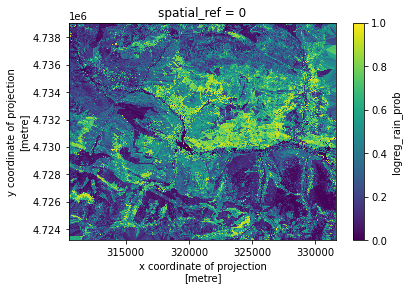

In [14]:
geo_grid.logreg_rain_prob.where(geo_grid.logreg_rain_prob!=geo_grid.logreg_rain_prob.rio.nodata).plot()

In [15]:
geo_grid.logreg_rain_prob.rio.to_raster("logreg_rain_prob.tif")